In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [4]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# having a 4-d array means that each numpy array has let's say 50,000 images for test with each image being 32x32 in size and all are coloured images so RGB = 3 channels.
# hence, shape = (50000,32,32,3)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [52]:
y_train=y_train.reshape(-1,)

In [53]:
y_train[0]

6

In [30]:
classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']

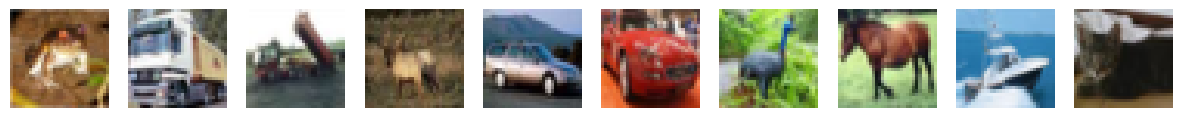

In [55]:
plt.figure(figsize = (15,2))
for i in range (10):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_train[i])
  plt.xlabel(classes[0])
  plt.axis('off')

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
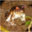

In [56]:
x_train[0]

In [57]:
#normalize the pixel values:
x_train = x_train/255
x_test = x_test/255

In [58]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [76]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [77]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [78]:
hist = model.fit(x_train,y_train, epochs = 15, validation_data = (x_test,y_test))

Epoch 1/15
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5234 - accuracy: 0.4425 - val_loss: 1.2385 - val_accuracy: 0.5591
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1408 - accuracy: 0.5969 - val_loss: 1.1480 - val_accuracy: 0.6037
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0133 - accuracy: 0.6461 - val_loss: 1.0605 - val_accuracy: 0.6295
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9313 - accuracy: 0.6753 - val_loss: 0.9516 - val_accuracy: 0.6736
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8633 - accuracy: 0.6984 - val_loss: 0.9480 - val_accuracy: 0.6748
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8106 - accuracy: 0.7169 - val_loss: 0.9281 - val_accuracy: 0.6821
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7608 - accuracy: 0.7340 - val_loss: 0.9346 - val_accuracy:

In [79]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0179 - accuracy: 0.6848


[1.017865777015686, 0.6848000288009644]

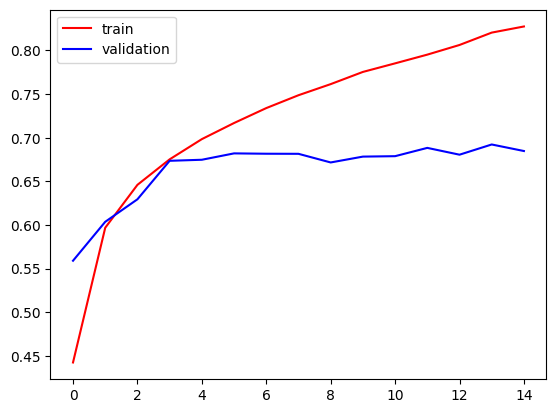

In [80]:
plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()